# Tugas 3 Data Mining -  EDA + Klasifikasi
---
List Anggota Kelompok 9
*   Cahaya Aulia Firdausyah (2006304)
*   Anderfa Jalu Kawani (2102671)
*   Sabila Rosad (2106000)


## Pendahuluan

Analisis Data Eksplorasi (EDA) dan klasifikasi memainkan peran penting dalam memahami pola historis dan membuat prediksi akurat. Pada kompetisi DMC tahun ini, task pertama berfokus pada analisis data sesi historis toko untuk memprediksi kemungkinan terjadinya pesanan (order). Data historis mencakup sekitar 50.000 sesi dengan atribut target "order" yang memiliki dua nilai: "y" untuk pesanan yang dilakukan dan "n" untuk tidak ada pesanan.

Melalui EDA, analisis awal terhadap data dilakukan untuk mengidentifikasi distribusi, pola, dan hubungan antar fitur yang berkontribusi pada kemungkinan pesanan. Informasi ini membantu membangun model prediktif berbasis machine learning untuk menentukan probabilitas [0,1] bagi setiap sesi baru. Evaluasi model dilakukan berdasarkan tingkat kesalahan terhadap hasil aktual dari sekitar 5.000 sesi yang disediakan. Dengan pendekatan ini, diharapkan solusi yang akurat dapat dihasilkan untuk mengoptimalkan prediksi pesanan di masa depan.

## Import Library

Import library yang akan digunakan

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive



##Load Dataset

In [70]:
# Mount Google Drive to Colab
drive.mount('/content/drive')

# Read the transact_train.txt file from Google Drive into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Data Mining/Tugas 3/transact_train.txt", delimiter="|")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Display the first 5 rows of the DataFrame to preview the data
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15.633,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y


In [72]:
# Show a summary of the DataFrame, including column data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

In [73]:
# Generate summary statistics (mean, median, standard deviation, etc.) for numerical columns
df.describe()

,sessionNo,startHour,startWeekday,duration,cCount,bCount
count,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000
mean,25274.631293,14.617061,5.924839,1573.901640,24.140317,4.135168
std,14441.366146,4.485914,0.790930,2427.123356,30.398164,4.451778
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,12731.000000,11.000000,5.000000,225.070000,5.000000,1.000000
50%,25470.000000,15.000000,6.000000,738.199000,13.000000,3.000000
75%,37542.000000,18.000000,7.000000,1880.265000,31.000000,5.000000
max,50000.000000,23.000000,7.000000,21580.092000,200.000000,108.000000


In [74]:
# Identify columns containing "?"
columns_with_question_mark = [col for col in df.columns if df[col].astype(str).str.contains('\?').any()]

print("Columns containing '?':", columns_with_question_mark)

Columns containing '?': ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep', 'onlineStatus', 'availability', 'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']


In [75]:
# Convert numeric columns to float
numeric_cols = ['sessionNo', 'startHour', 'startWeekday', 'duration', 'cCount', 'bCount', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'lastOrder']
df[numeric_cols] = df[numeric_cols].astype(float)

# Convert categorical columns to string
categorical_cols = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep', 'onlineStatus', 'availability', 'order', 'customerNo', 'address']
df[categorical_cols] = df[categorical_cols].astype(str)

# Verify the data types
print(df.dtypes)

ValueError: could not convert string to float: '?'

In [ ]:
# Define a list of columns that are numeric (i.e., continuous or quantitative values)
numeric_cols = ['sessionNo', 'startHour', 'startWeekday', 'duration', 'cCount', 'bCount', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'lastOrder']

# Define a list of columns that are categorical (i.e., discrete or qualitative values)
categorical_cols = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep', 'onlineStatus', 'availability', 'order', 'customerNo', 'address']

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in numeric columns using mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

In [ ]:
# Impute missing values in categorical columns using mode
from collections import Counter

for col in categorical_cols:
    mode_value = df[col].mode().iloc[0]
    df[col] = df[col].fillna(mode_value)

In [ ]:
# Check for remaining '?' values
print(df.isin(['?']).sum())

In [ ]:
# Check for NaN values
print(df.isna().sum())

In [ ]:
# Display the first 5 rows of the DataFrame to preview the data
df.head()

In [ ]:
# Summary statistics for numeric columns
print(df[numeric_cols].describe())

# Visualize the distributions of numeric columns
import matplotlib.pyplot as plt
df[numeric_cols].hist(figsize=(12, 8))
plt.show()

In [ ]:
# Explore the categorical columns
for col in categorical_cols:
    print(f"Column: {col}")

    # Print the top 10 most frequent values
    value_counts = df[col].value_counts()
    print("Most frequent values:")
    print(value_counts.head(10))

    # Check for any unexpected or invalid values
    unusual_values = value_counts[value_counts < 10].index
    if len(unusual_values) > 0:
        print("Unusual/Infrequent values:")
        print(unusual_values)
    print("---")

In [76]:
# Cross-validate columns
print(df.loc[df['cCount'] > df['bCount']])

        sessionNo  startHour  startWeekday  duration  cCount cMinPrice  \
8               3          6             5   181.477       9     29.99   
9               3          6             5   297.018      11      9.99   
10              3          6             5   310.967      11      9.99   
11              3          6             5   324.278      11      9.99   
12              3          6             5   341.613      11      9.99   
...           ...        ...           ...       ...     ...       ...   
429006      49998         18             7  2961.909       6     59.99   
429007      49998         18             7  4700.383      50      9.99   
429008      49998         18             7  5988.882      77      9.99   
429009      49999         18             7   675.114       6      59.0   
429010      49999         18             7   715.341       7      59.0   

       cMaxPrice cSumPrice  bCount bMinPrice  ...          availability  \
8          29.99     89.97       1  

In [ ]:
# Identify outliers using z-score
from scipy.stats import zscore

z = np.abs(zscore(df[numeric_cols]))

# Create a boolean mask for outlier rows, considering any outlier across columns
outlier_mask = (z > 3).any(axis=1)

# Filter the DataFrame using the outlier mask
outliers = df[outlier_mask]

print(outliers)

        sessionNo  startHour  startWeekday  duration  cCount cMinPrice  \
1             1.0        6.0           5.0    11.940     1.0     59.99   
77           12.0        6.0           5.0   555.557    14.0      5.99   
78           12.0        6.0           5.0   594.719    14.0      5.99   
79           12.0        6.0           5.0   638.904    14.0      5.99   
80           12.0        6.0           5.0   735.665    14.0      5.99   
...           ...        ...           ...       ...     ...       ...   
428739    49975.0       18.0           7.0   992.672    17.0       5.0   
428740    49975.0       18.0           7.0  1054.158    17.0       5.0   
428741    49975.0       18.0           7.0  1075.531    17.0       5.0   
428742    49975.0       18.0           7.0  1127.911    17.0       5.0   
428743    49975.0       18.0           7.0  1183.038    17.0       5.0   

       cMaxPrice cSumPrice  bCount bMinPrice  ...          availability  \
1          59.99     59.99     1.0  

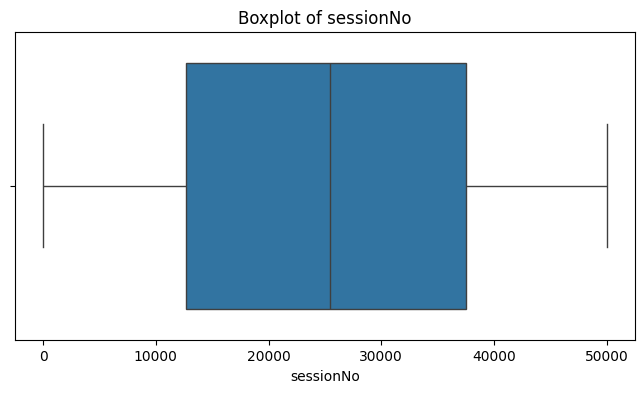

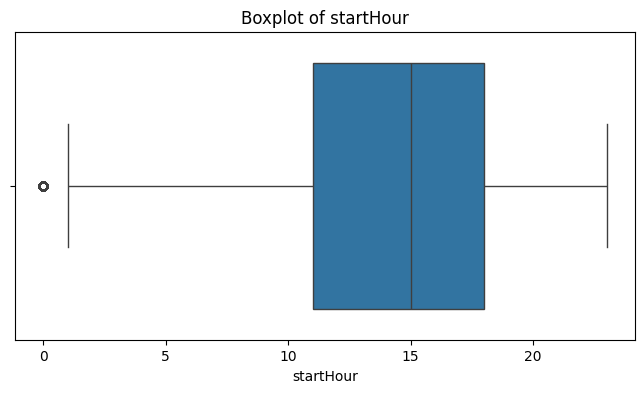

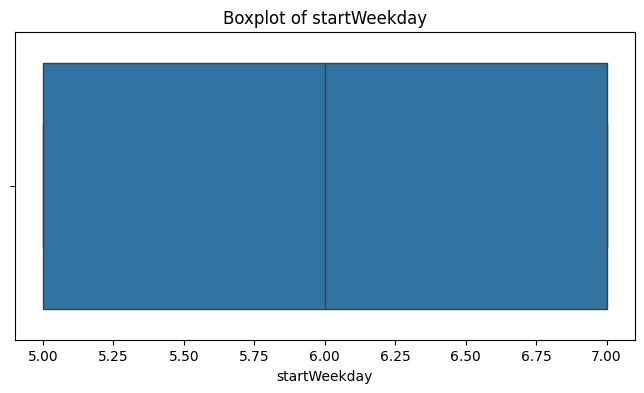

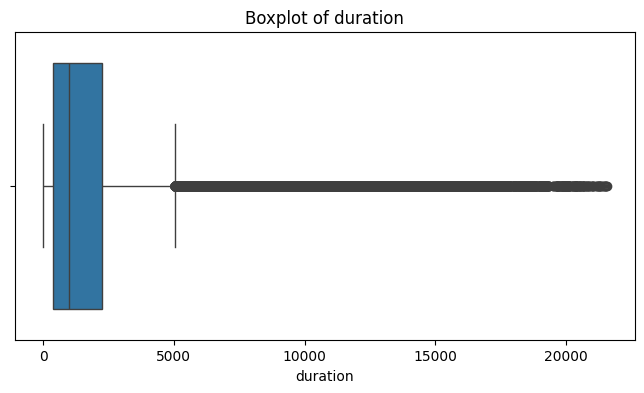

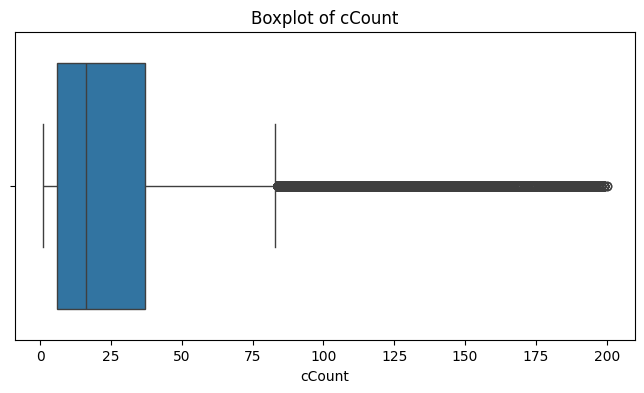

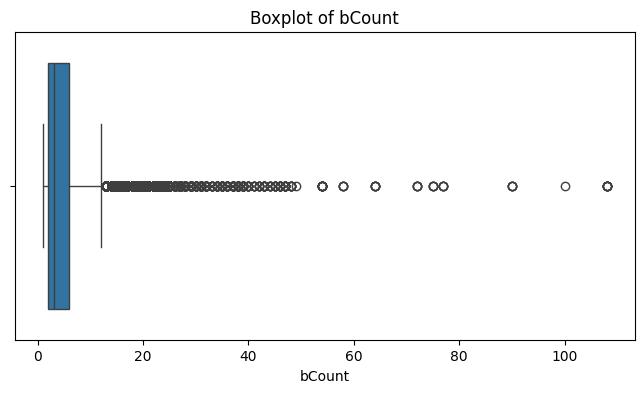

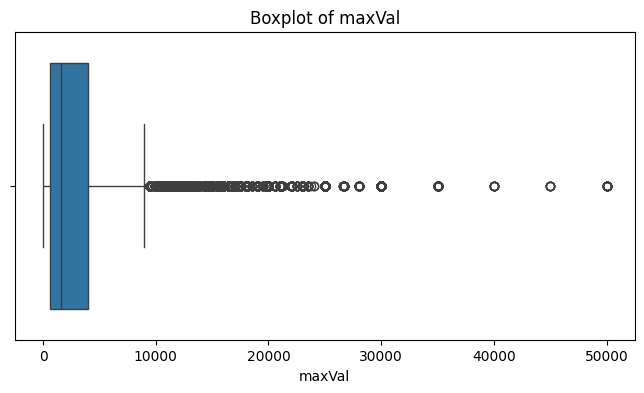

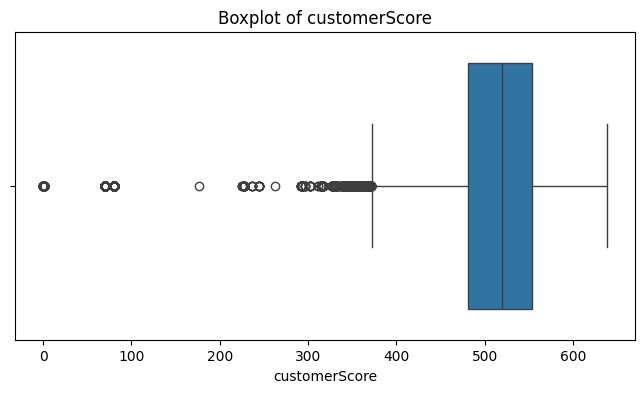

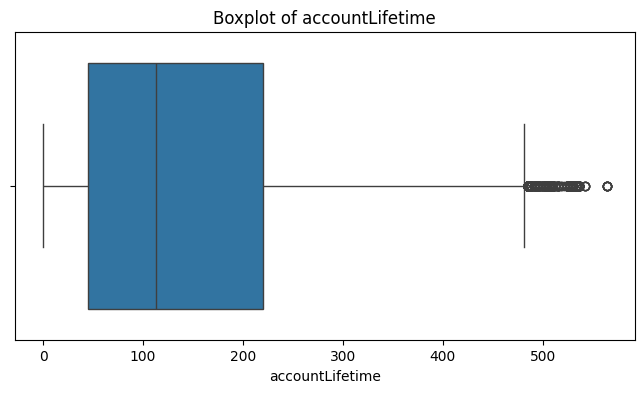

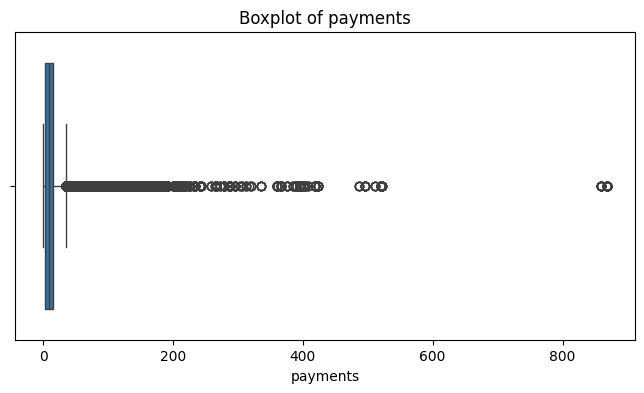

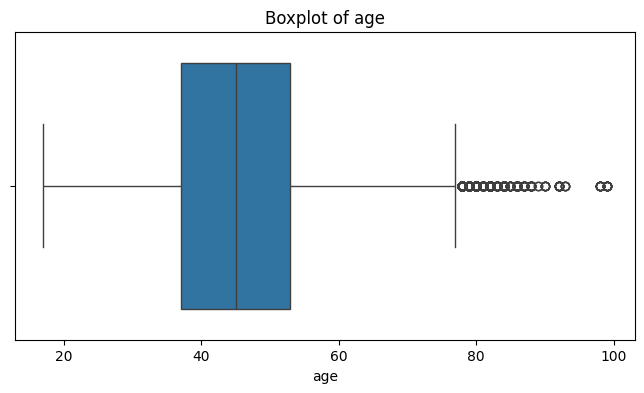

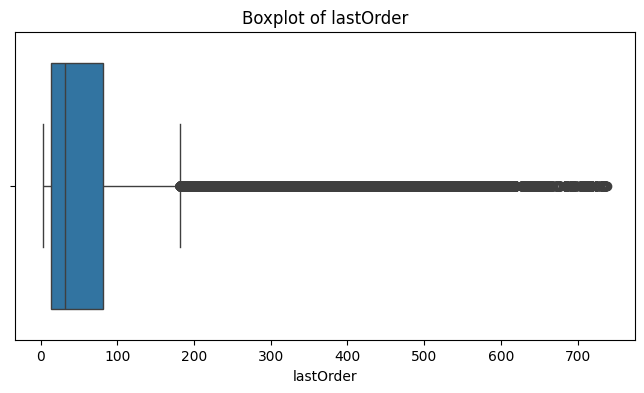

In [ ]:
# Boxplots for each numeric column to spot outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
#Convert all to lowercase
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.lower())

In [ ]:
# Check logical consistency between min and max price columns
inconsistent_prices = df[df['cMinPrice'] > df['cMaxPrice']]
print("Rows with inconsistent price values:\n", inconsistent_prices)

Rows with inconsistent price values:
         sessionNo  startHour  startWeekday  duration  cCount cMinPrice  \
11            3.0        6.0           5.0   324.278    11.0      9.99   
27            7.0        6.0           5.0   268.713     6.0       3.0   
28            7.0        6.0           5.0   274.297     6.0       3.0   
29            7.0        6.0           5.0   286.562     6.0       3.0   
31            7.0        6.0           5.0   304.672     6.0       3.0   
...           ...        ...           ...       ...     ...       ...   
428953    49993.0       18.0           7.0  3866.511    69.0      9.99   
428954    49993.0       18.0           7.0  3915.585    69.0      9.99   
428955    49993.0       18.0           7.0  4094.847    69.0      9.99   
428956    49993.0       18.0           7.0  4113.213    69.0      9.99   
428972    49995.0       18.0           7.0   572.544    22.0      9.99   

       cMaxPrice cSumPrice  bCount bMinPrice  ...          availability  

In [ ]:
# Correct inconsistent price values
df.loc[df['cMinPrice'] > df['cMaxPrice'], ['cMinPrice', 'cMaxPrice']] = df.loc[df['cMinPrice'] > df['cMaxPrice'], ['cMaxPrice', 'cMinPrice']].values

In [ ]:
# Display summary statistics for all columns in the DataFrame, including both numeric and categorical columns
print(df.describe(include='all'))

            sessionNo      startHour   startWeekday       duration  \
count   141163.000000  141163.000000  141163.000000  141163.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     25271.805494      14.662865       5.924555    1838.816338   
std      14442.609194       4.324934       0.787167    2512.450329   
min          1.000000       0.000000       5.000000       0.062000   
25%      12702.000000      11.000000       5.000000     383.329000   
50%      25482.000000      15.000000       6.000000     992.864000   
75%      37533.000000      18.000000       7.000000    2245.432500   
max      49995.000000      23.000000       7.000000   21553.323000   

               cCount cMinPrice cMaxPrice cSumPrice         bCount bMinPrice  \
count   141163.000000    141163    141163    141163  141163.000000    141163   

##Model Klasifikasi

In [ ]:
import pandas as pd #Make sure pandas is imported
from sklearn.model_selection import train_test_split #Import train_test_split to split the data
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' is your DataFrame containing all the data

X = df.drop(columns=['order'])
y = df['order']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate through columns of X_train and encode object (string) types
for col in X_train.select_dtypes(include=['object']).columns:
    # Fit on the combined unique values from both training and testing data
    all_values = pd.concat([X_train[col], X_test[col]]).unique()
    encoder.fit(all_values)

    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col]) # Apply the same encoding to X_test

# Create and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data  #This line is added to get predictions from the model
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# show classification reports and confusion matrix
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

Accuracy (Random Forest): 0.9701413239825736
Classification Report (Random Forest):
               precision    recall  f1-score   support

           n       1.00      0.84      0.91      5259
           y       0.97      1.00      0.98     22974

    accuracy                           0.97     28233
   macro avg       0.98      0.92      0.95     28233
weighted avg       0.97      0.97      0.97     28233

Confusion Matrix (Random Forest):
 [[ 4436   823]
 [   20 22954]]


## Analisis Model Klasifikasi

- Performa keseluruhan: model menunjukkan performa yang sangat baik dengan akurasi mencapai 97.01%. Ini berarti model mampu memprediksi dengan benar status pesanan (order atau tidak order) untuk 97.01% dari data uji.

- Performa per Kategori:

  - Kategori "Order" (y):

    - Precision 97%:
      
      Dari semua sesi yang diprediksi sebagai "Order", 97% di antaranya benar-benar "Order". Ini menunjukkan bahwa model sangat akurat dalam mengidentifikasi sesi yang benar-benar menghasilkan pesanan. Tingkat kesalahan dalam mengklasifikasikan sesi sebagai "Order" padahal sebenarnya bukan "Order" (False Positive) relatif rendah.

    - Recall 100%:
      
      Model berhasil mendeteksi semua sesi yang sebenarnya "Order".  Ini berarti tidak ada sesi "Order" yang terlewatkan oleh model. Model sangat baik dalam menangkap semua kasus positif (sesi yang menghasilkan pesanan).

  - Kategori "Tidak Order" (n):

    - Precision 100%:
    
      Dari semua sesi yang diprediksi sebagai "Tidak Order", 100% di antaranya benar-benar "Tidak Order". Ini menunjukkan bahwa model sangat akurat dalam mengidentifikasi sesi yang tidak menghasilkan pesanan. Tidak ada sesi yang salah diklasifikasikan sebagai "Tidak Order" padahal sebenarnya "Order" (False Negative).

    - Recall 84%:
    
      Model berhasil mendeteksi 84% dari semua sesi yang sebenarnya "Tidak Order". Ini berarti ada sebagian kecil sesi "Tidak Order" yang salah diprediksi sebagai "Order". Meskipun recall tidak setinggi precision, namun nilainya masih cukup tinggi, menunjukkan bahwa model cukup baik dalam mendeteksi kasus negatif (sesi yang tidak menghasilkan pesanan).

- Confusion Matrix:

  Confusion matrix memberikan gambaran yang lebih detail tentang performa model dengan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kategori.

  - 4436 prediksi benar untuk "Tidak Order" (True Negative)
  - 22954 prediksi benar untuk "Order" (True Positive)
  - 823 data "Tidak Order" salah diklasifikasikan sebagai "Order" (False Positive)
  - 20 data "Order" salah diprediksi sebagai "Tidak Order" (False Negative)


  Dari confusion matrix, terlihat bahwa model sangat baik dalam memprediksi kedua kategori, dengan jumlah prediksi yang benar jauh lebih tinggi daripada prediksi yang salah. Jumlah False Positive dan False Negative relatif rendah, menunjukkan performa model yang baik.

## Visualisasi Confusion Matrix

- Prediksi Benar:

  - Kotak di pojok kiri atas (4436) menunjukkan jumlah True Negative (prediksi "No" yang benar).
  - Kotak di pojok kanan bawah (22954) menunjukkan jumlah True Positive (prediksi "Yes" yang benar).
  - Kedua nilai ini sangat tinggi, menunjukkan model sangat akurat dalam memprediksi kedua kelas.

- Prediksi Salah:
  - Kotak di pojok kanan atas (823) menunjukkan jumlah False Positive.
  - Kotak di pojok kiri bawah (20) menunjukkan jumlah False Negative.
  - Kedua nilai ini relatif rendah dibandingkan dengan prediksi yang benar, menunjukkan model membuat sedikit kesalahan.

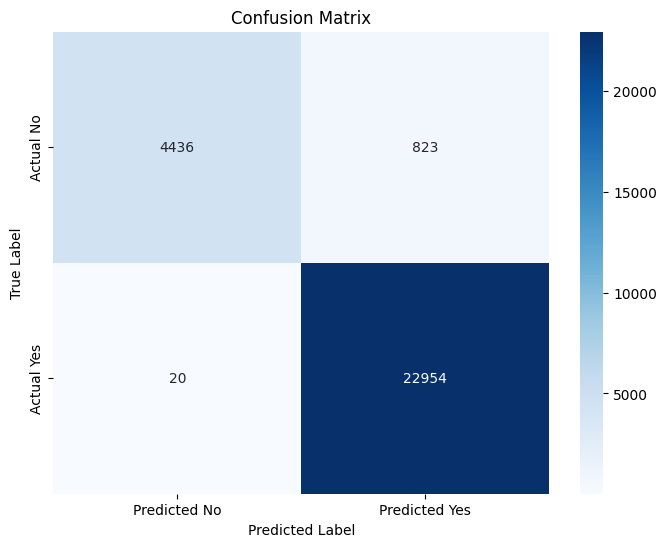

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Visualisasi ROC Curve

- Kurva ROC mendekati sudut kiri atas grafik, yang menunjukkan model memiliki performa klasifikasi yang sangat baik.
- Kurva hampir sejajar dengan garis True Positive Rate = 1, yang menunjukkan jumlah prediksi benar (positif) sangat tinggi dibandingkan prediksi salah (positif palsu).
- Nilai AUC yang tercantum adalah 1.00, yang merupakan nilai maksimum.

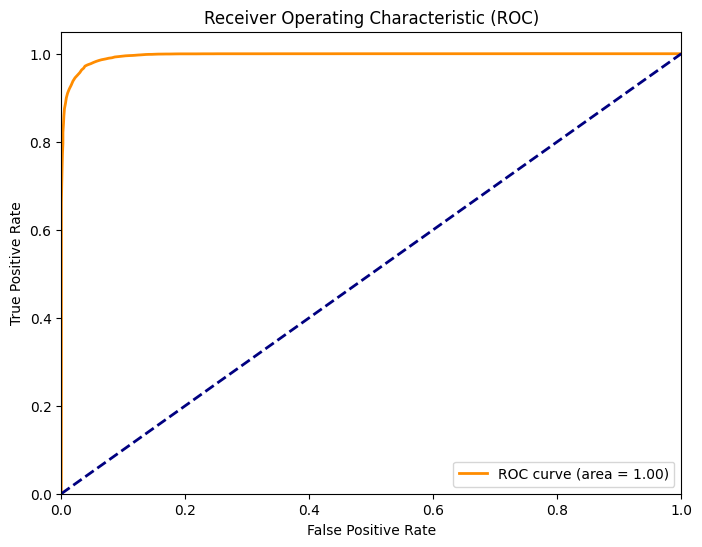

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have probabilities for the positive class (e.g., from predict_proba)
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Convert 'y_test' to numerical format where 'y' is 1 and 'n' is 0
y_test_numeric = [1 if value == 'y' else 0 for value in y_test]

# Use the numerical y_test in roc_curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Visualisasi Feature Importance

- sessionNo, customerNo, dan accountLifetime memiliki nilai feature importance tertinggi. Hal ini menunjukkan bahwa fitur-fitur tersebut memiliki pengaruh paling besar dalam menentukan output model.

- availability, address, dan onlineStatus memiliki kontribusi yang sangat kecil terhadap prediksi model. Fitur ini mungkin tidak terlalu relevan atau penting bagi model.

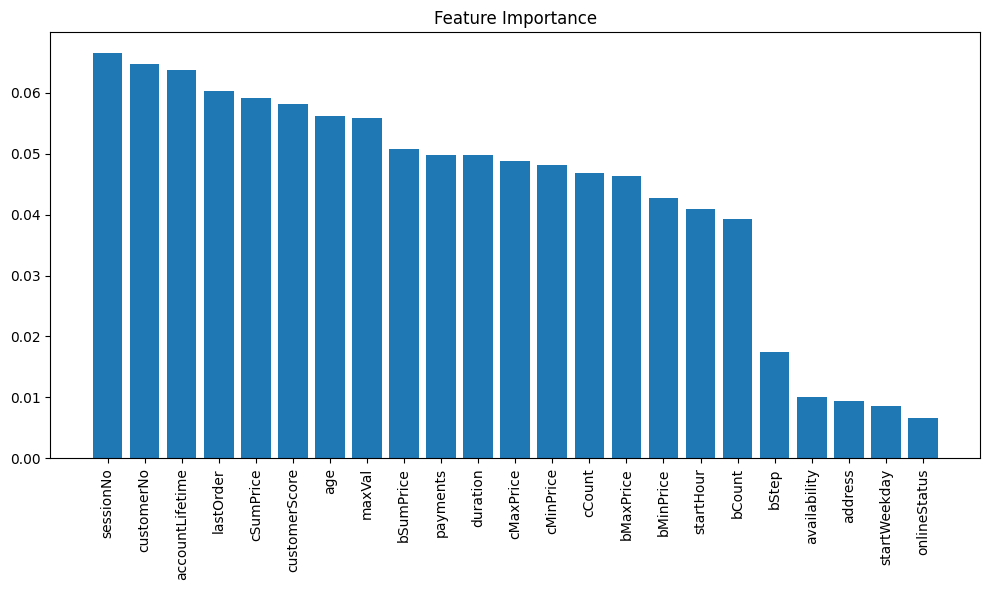

In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Kesimpulan

Model klasifikasi yang dikembangkan menunjukkan performa yang sangat baik dalam memprediksi status pesanan (order atau tidak order). Dengan akurasi 97.01%, model mampu membuat prediksi yang tepat untuk sebagian besar data uji. Analisis metrik evaluasi menunjukkan:  

1. **Kinerja per Kategori**:  
   - Untuk kategori "Order" (y), precision mencapai 97% dan recall 100%, menandakan bahwa model sangat andal dalam mendeteksi semua sesi yang menghasilkan pesanan tanpa terlewat.  
   - Untuk kategori "Tidak Order" (n), precision mencapai 100%, dengan recall 84%, menunjukkan beberapa sesi "Tidak Order" salah diklasifikasikan sebagai "Order".  

2. **Confusion Matrix**:  
   Model menghasilkan prediksi benar yang jauh lebih tinggi dibandingkan dengan prediksi salah, menunjukkan jumlah kesalahan (False Positive dan False Negative) relatif rendah.  

3. **ROC Curve dan AUC**:  
   Dengan nilai AUC sebesar 1.00, model memiliki kemampuan klasifikasi yang luar biasa baik dalam membedakan kedua kategori.  

4. **Feature Importance**:  
   Fitur seperti *sessionNo*, *customerNo*, dan *accountLifetime* memberikan kontribusi terbesar dalam prediksi, sementara fitur seperti *availability*, *address*, dan *onlineStatus* memiliki kontribusi yang kecil, sehingga dapat dipertimbangkan untuk diabaikan atau dioptimalkan lebih lanjut.

Secara keseluruhan, model ini sangat efektif dalam memprediksi status pesanan dengan tingkat kesalahan yang rendah dan kontribusi fitur yang terukur, menjadikannya alat yang handal untuk mendukung analisis prediktif di masa depan.